In [4]:
import pandas as pd
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as dt

In [7]:
precos = pd.DataFrame()

stocks = ["ABEV3.SA" , "ASAI3.SA" , "AZUL4.SA" , "B3SA3.SA" , "BBAS3.SA" , "BBDC3.SA",  "BBDC4.SA" , "BBSE3.SA" , "BEEF3.SA", 
"BPAC11.SA", "BRAP4.SA" , "BRDT3.SA" , "BRFS3.SA" , "BRKM5.SA" , "BRML3.SA" , "AMER3.SA" , "CCRO3.SA" , "CIEL3.SA" ,
"CMIG4.SA"  ,"COGN3.SA" , "CPFE3.SA" , "CPLE6.SA" , "CRFB3.SA" , "CSAN3.SA" , "CSNA3.SA" , "CVCB3.SA" , "CYRE3.SA" ,
"ECOR3.SA"  ,"EGIE3.SA" , "ELET3.SA" , "ELET6.SA" , "EMBR3.SA" , "ENBR3.SA" , "ENEV3.SA" , "ENGI11.SA", "EQTL3.SA" ,
"EZTC3.SA"  ,"FLRY3.SA" , "GGBR4.SA" , "GNDI3.SA" , "GOAU4.SA" , "GOLL4.SA" , "HAPV3.SA" , "HGTX3.SA" , "HYPE3.SA" ,
"IGTA3.SA"  ,"IRBR3.SA" , "ITSA4.SA" , "ITUB4.SA" , "JBSS3.SA" , "JHSF3.SA" , "KLBN11.SA", "LAME4.SA" , "LCAM3.SA" ,
"LREN3.SA"  ,"MGLU3.SA" , "MRFG3.SA" , "MRVE3.SA" , "MULT3.SA" , "NTCO3.SA" , "PCAR3.SA" , "PETR3.SA" , "PETR4.SA" ,
"PRIO3.SA"  ,"QUAL3.SA" , "RADL3.SA" , "RAIL3.SA" , "RENT3.SA" , "SANB11.SA", "SBSP3.SA" , "SULA11.SA", "SUZB3.SA" ,
"TAEE11.SA" ,"TIMS3.SA" , "TOTS3.SA" , "UGPA3.SA" , "USIM5.SA" , "VALE3.SA" , "VIVT3.SA" , "VIIA3.SA" , "WEGE3.SA" ,
"YDUQ3.SA"]

for i in stocks:
    precos[i] = dt.DataReader(i, data_source = 'yahoo', start = '2018-01-01')['Close']
    
precos.dropna(inplace=True)

rets = precos.pct_change()

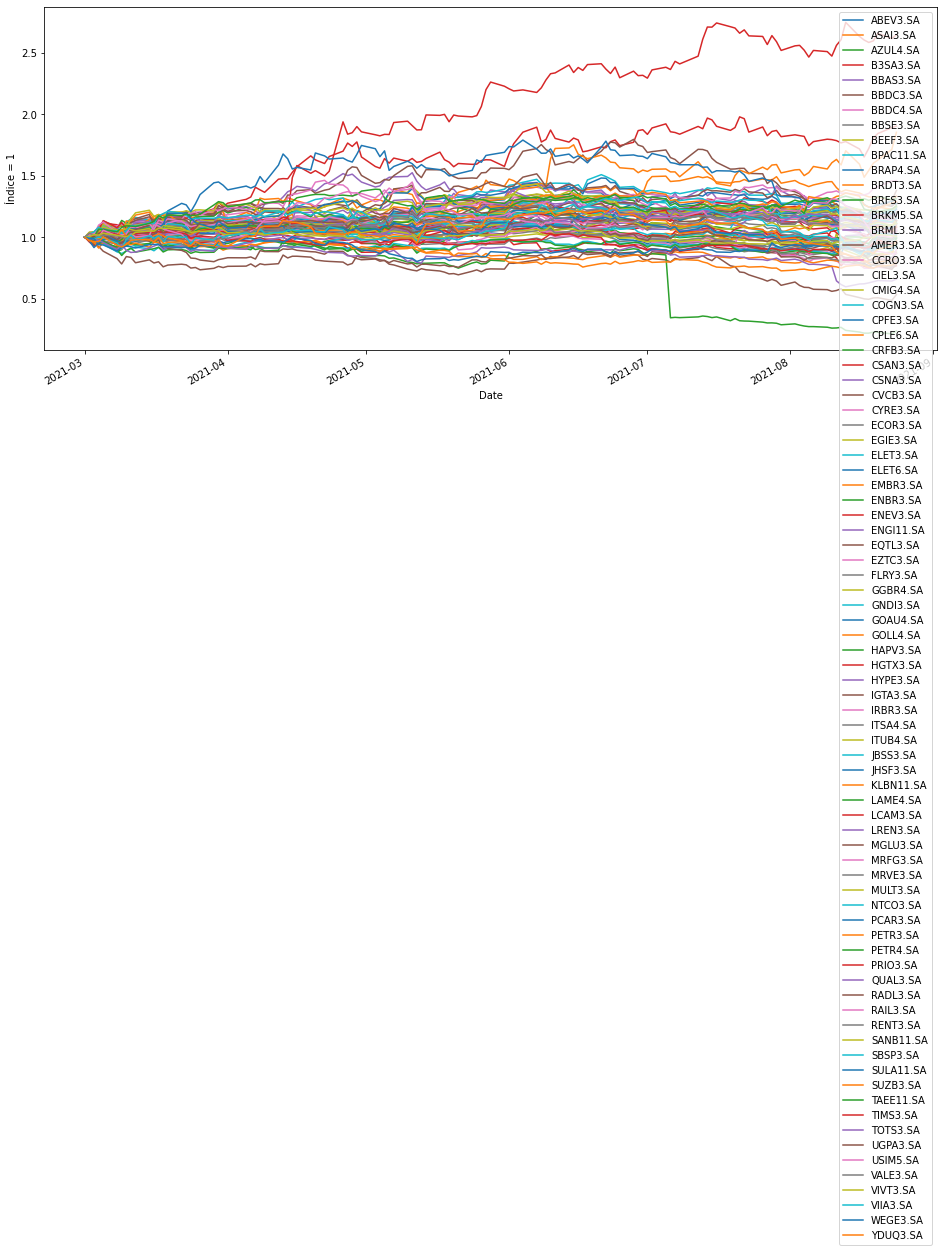

In [8]:
(precos.loc[precos.index.sort_values()]/precos.loc[precos.index.sort_values()].iloc[0]).plot(figsize=(16,7))
plt.ylabel("Índice = 1");

In [9]:
rf = (1 + 0.0575)**(1/252)-1

In [10]:
corr_mat = rets.corr()
corr_mat

,ABEV3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,...,TAEE11.SA,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA,VIIA3.SA,WEGE3.SA,YDUQ3.SA
ABEV3.SA,1.000000,0.302013,0.363347,0.264602,0.524124,0.479118,0.482870,0.472923,0.161710,0.295056,...,0.297932,0.367549,0.293068,0.245850,0.110990,0.109122,0.477748,0.343777,0.260589,0.315129
ASAI3.SA,0.302013,1.000000,0.259234,0.420831,0.249086,0.316886,0.279419,0.345641,0.202347,0.438698,...,0.195340,0.307818,0.368537,0.335306,0.224165,0.153128,0.226437,0.402085,0.289865,0.269717
AZUL4.SA,0.363347,0.259234,1.000000,0.274660,0.435371,0.466258,0.438593,0.409476,0.080567,0.384425,...,0.149770,0.293766,0.275094,0.324568,0.153659,0.209493,0.229119,0.458731,0.304944,0.438257
B3SA3.SA,0.264602,0.420831,0.274660,1.000000,0.359461,0.407975,0.353692,0.415937,0.155741,0.478931,...,0.176369,0.367157,0.316788,0.432179,0.181455,0.140798,0.168815,0.313870,0.394748,0.270995
BBAS3.SA,0.524124,0.249086,0.435371,0.359461,1.000000,0.732288,0.736853,0.449980,0.158564,0.364661,...,0.308285,0.380452,0.169334,0.464756,0.035631,0.131058,0.358116,0.357646,0.208156,0.360900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VALE3.SA,0.109122,0.153128,0.209493,0.140798,0.131058,0.212486,0.195528,0.178739,0.039655,0.147300,...,0.022468,-0.010373,0.038843,0.110735,0.537792,1.000000,0.029036,0.074811,0.119793,0.137340
VIVT3.SA,0.477748,0.226437,0.229119,0.168815,0.358116,0.378488,0.358812,0.472332,0.176366,0.155530,...,0.293917,0.611873,0.225590,0.301507,0.040568,0.029036,1.000000,0.153817,0.324596,0.323102
VIIA3.SA,0.343777,0.402085,0.458731,0.313870,0.357646,0.381080,0.344251,0.546412,0.264260,0.460018,...,0.189577,0.312106,0.355331,0.461349,0.086256,0.074811,0.153817,1.000000,0.340247,0.436365
WEGE3.SA,0.260589,0.289865,0.304944,0.394748,0.208156,0.253199,0.218575,0.309438,0.177211,0.387927,...,0.228797,0.383248,0.441817,0.262653,0.163783,0.119793,0.324596,0.340247,1.000000,0.335324


In [11]:
mean_rets = rets.mean()
mean_rets

ABEV3.SA    0.002184
ASAI3.SA    0.001919
AZUL4.SA    0.000345
B3SA3.SA   -0.001941
BBAS3.SA    0.000714
              ...   
VALE3.SA    0.000282
VIVT3.SA    0.000107
VIIA3.SA   -0.000201
WEGE3.SA   -0.000522
YDUQ3.SA    0.000133
Length: 82, dtype: float64

In [12]:
rets_vector = np.linspace(min(mean_rets), max(mean_rets),2000)
rets_vector

array([-0.00873576, -0.00872696, -0.00871816, ...,  0.00883715,
        0.00884595,  0.00885475])

In [22]:
def volatility(pesos):
    pesos = np.array(pesos)
    covar = np.array(rets.cov())
    vol = np.dot(pesos.T, np.dot(covar,pesos))
    return np.sqrt(vol)

In [23]:
def returns(pesos):
    return np.dot(np.array(pesos), np.array(mean_rets)).sum()

In [24]:
def checksum(pesos):
    return np.sum(pesos)-1

In [25]:
chute = [0.00025 for i in range(82)]

In [30]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),
          (0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1), (0,1),(0,1))

In [31]:
fronteira = []
fronteira_pesos = []
for retorno_possivel in rets_vector:
    cons = ({"type":"eq","fun":checksum},
           {"type":"eq","fun":lambda n:returns(n)-retorno_possivel})
    resultado = opt.minimize(volatility,chute,method = "SLSQP",bounds = bounds, constraints=cons)
    fronteira.append(resultado["fun"])
    fronteira_pesos.append(resultado["x"])

KeyboardInterrupt: 

In [38]:
min_var = min(fronteira)
retorno_min_var = rets_vector[fronteira.index(min(fronteira))]

In [ ]:
ret = []
vol=[]
for i in range(2000000):
    weights = np.random.rand(82)
    weights /= weights.sum()
    vol.append(volatility(weights))
    ret.append(returns(weights))

In [ ]:
sharpe_fronteira = (rets_vector-rf)/fronteira

In [46]:
sharpe_max_vol = fronteira[np.argmax(sharpe_fronteira)]
sharpe_max_retorno = rets_vector[np.argmax(sharpe_fronteira)]

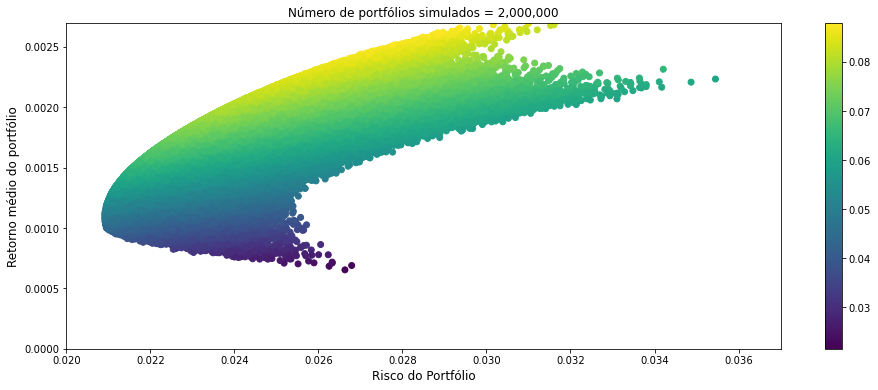

In [50]:
sharpe = (np.array(ret)-rf)/np.array(vol)
plt.figure(figsize=(16,6))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.title("Número de portfólios simulados = 2,000,000")
plt.axis([0.02,0.037,0,0.0027])
colorbar=plt.colorbar()
colorbar.ax.set_label("Sharpe")
plt.show()

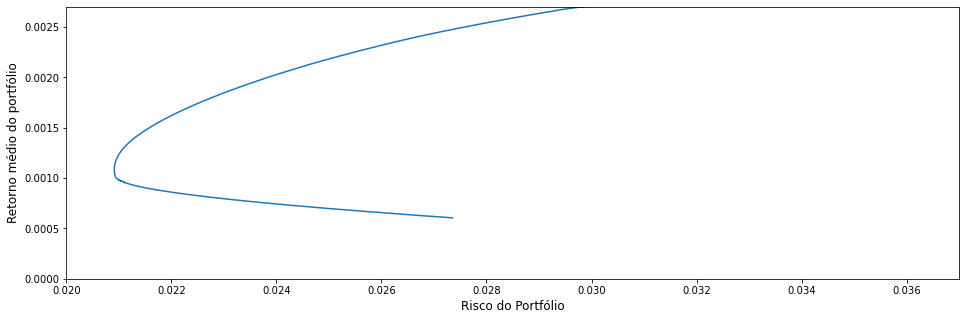

In [52]:
plt.figure(figsize=(16,5))
plt.plot(fronteira,rets_vector)
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.show()

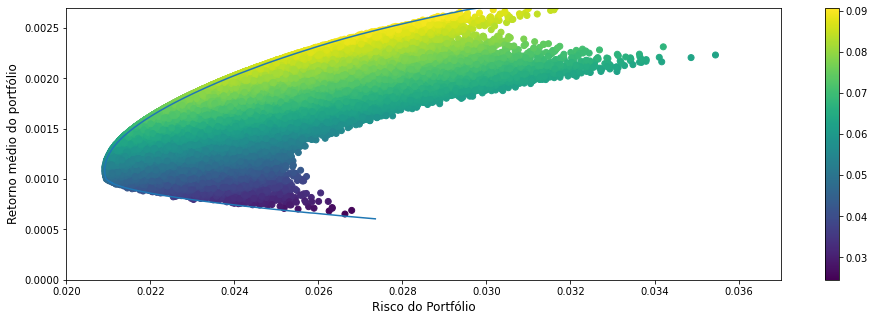

In [54]:
sharpe = (np.array(ret))/np.array(vol)
plt.figure(figsize=(16,5))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.plot(fronteira,rets_vector,label="Fronteira por otimização")
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.colorbar()
plt.show()

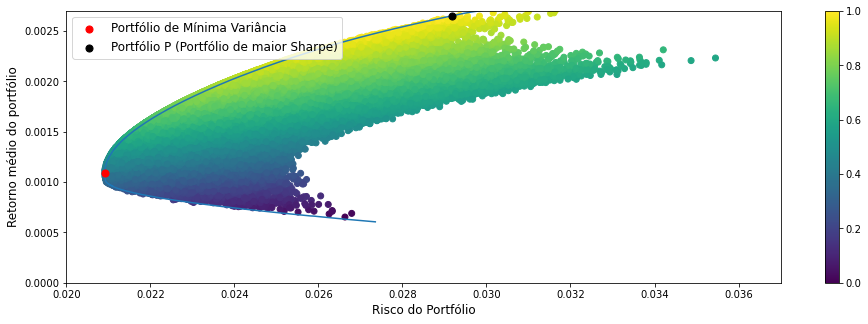

In [55]:
sharpe = (np.array(ret)-rf)/np.array(vol)
plt.figure(figsize=(16,5))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.scatter(min_var,retorno_min_var,label="Portfólio de Mínima Variância",c="red",s=50,zorder=2)
plt.scatter(sharpe_max_vol,sharpe_max_retorno,label="Portfólio P (Portfólio de maior Sharpe)",c="black",s=50,zorder=2)
plt.plot(fronteira,rets_vector,zorder=1)
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.legend(loc="upper left",fontsize=12)
plt.colorbar()
plt.show()

In [56]:
inclinacao_lac = (sharpe_max_retorno-rf)/sharpe_max_vol

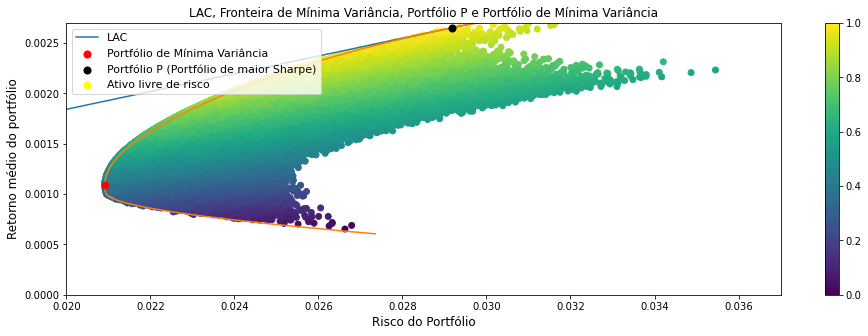

In [58]:
sharpe = (np.array(ret)-rf)/np.array(vol)
plt.figure(figsize=(16,5))
plt.scatter(vol,ret,c=sharpe,cmap="viridis")
plt.scatter(min_var,retorno_min_var,label="Portfólio de Mínima Variância",c="red",s=50,zorder=2)
plt.scatter(sharpe_max_vol,sharpe_max_retorno,label="Portfólio P (Portfólio de maior Sharpe)",c="black",s=50,zorder=2)
plt.scatter(0,rf,label="Ativo livre de risco",c="yellow",s=50,zorder=2)
plt.plot(np.array([0,0.01,0.02,0.03]),np.array([0,0.01,0.02,0.03])*inclinacao_lac+rf,label="LAC",zorder=1)
plt.plot(fronteira,rets_vector,zorder=1)
plt.xlabel("Risco do Portfólio",fontsize=12)
plt.ylabel("Retorno médio do portfólio",fontsize=12)
plt.axis([0.02,0.037,0,0.0027])
plt.legend(loc="upper left",fontsize=11)
plt.title("LAC, Fronteira de Mínima Variância, Portfólio P e Portfólio de Mínima Variância")
plt.colorbar()
plt.show()